# ***Tesis de MBA - ESAN***
Gabriel Ramos

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

path = "/content/drive/My Drive/Documentos/Cursos/Cursos GR/MBA ESAN/Tesis/Bases de datos/VD_FDI"
os.chdir(path)

# **Base de datos de FDI (001_FDI_FMI_BM.xlsx)**

In [ ]:
import pandas as pd
filename = 'https://github.com/gabrielramost/MBA_Tesis/raw/main/Bases%20de%20datos%20recopiladas/001_FDI_FMI_BM.xlsx'
df = pd.read_excel(filename)

In [ ]:
# Lista de columnas para eliminar
columns_to_drop = ['Series Name', 'Series Code', 'Country Code', 'Time Code']

# Eliminar las columnas
df_cleaned = df.drop(columns=columns_to_drop)

In [ ]:
# Diccionario para mapear los nombres actuales de las columnas a los nuevos nombres
rename_columns = {
    'Country Name': 'FDI0',
    'Time': 'FDI2',
    'Value': 'FDI4'
}

# Renombrar las columnas
df_cleaned = df_cleaned.rename(columns=rename_columns)

In [ ]:
df_cleaned = df_cleaned.dropna(how='all')

In [ ]:
df = df_cleaned

In [ ]:
import numpy as np

# Reemplazar la cadena '..' por NaN
df['FDI4'] = df['FDI4'].replace('..', np.nan)

# Convertir la columna a float
df['FDI4'] = df['FDI4'].astype(float)

In [ ]:
# Ver cuantos países hay en la base de datos
unique_values_count_FDI0 = df['FDI0'].nunique()
print("Número de valores únicos en la variable FDI0:", unique_values_count_FDI0)

Número de valores únicos en la variable FDI0: 266


In [ ]:
import pandas as pd

# Cambiar el nombre de las columnas
df = df.rename(columns={'FDI0': 'country_name', 'FDI2': 'year'})

# Convertir 'year' a int
df['year'] = df['year'].astype(int)

In [ ]:
df1 = df.reset_index(drop=True)
df1

,country_name,year,FDI4
0,Afghanistan,1960,NaN
1,Afghanistan,1961,NaN
2,Afghanistan,1962,NaN
3,Afghanistan,1963,NaN
4,Afghanistan,1964,NaN
...,...,...,...
16753,Zimbabwe,2018,7.178653e+08
16754,Zimbabwe,2019,2.495000e+08
16755,Zimbabwe,2020,1.503600e+08
16756,Zimbabwe,2021,1.660000e+08


# **Base de datos de V-DEM (002_VDEM.dta)**

In [ ]:
# Leer el archivo de Stata
file_path = 'https://github.com/gabrielramost/MBA_Tesis/raw/main/Bases%20de%20datos%20recopiladas/002_VDEM.dta'
df2 = pd.read_stata(file_path)

In [ ]:
# Eliminar las columnas especificadas
columns_to_drop = [
    'country_text_id', 'e_gdppc', 'e_total_fuel_income_pc',
    'e_total_resources_income_pc', 'e_wbgi_cce', 'e_wbgi_gee',
    'e_wbgi_pve', 'e_wbgi_rle', 'e_wbgi_rqe', 'e_wbgi_vae',
    'v2cademmob', 'v2x_delibdem', 'v2x_egaldem', 'v2x_execorr',
    'v2x_freexp', 'v2x_libdem', 'v2x_partipdem', 'v2xcl_acjst',
    'v2x_neopat', 'v2x_pubcorr', 'v2xnp_client', 'v2xnp_regcorr'
]
df2 = df2.drop(columns=columns_to_drop)

# Convertir la columna 'year' a tipo int
df2['year'] = df2['year'].astype(int)

# Resetear el índice de las filas
df2 = df2.reset_index(drop=True)

In [ ]:
df2

,country_name,year,v2x_polyarchy,v2cacamps,v2caviol,v2cagenmob,v2x_regime,v2x_corr,v2x_rule,v2xcl_prpty,e_gdp,e_miinflat
0,Mexico,1789,0.028,NaN,NaN,NaN,NaN,0.680,0.266,0.241,871.938,-16.915
1,Mexico,1790,0.028,NaN,NaN,NaN,NaN,0.680,0.266,0.241,878.908,-8.431
2,Mexico,1791,0.028,NaN,NaN,NaN,NaN,0.680,0.266,0.241,888.411,-19.798
3,Mexico,1792,0.028,NaN,NaN,NaN,NaN,0.680,0.266,0.241,902.880,0.649
4,Mexico,1793,0.028,NaN,NaN,NaN,NaN,0.680,0.266,0.241,912.872,0.645
...,...,...,...,...,...,...,...,...,...,...,...,...
27550,Piedmont-Sardinia,1857,0.207,NaN,NaN,NaN,NaN,0.239,0.538,0.396,NaN,NaN
27551,Piedmont-Sardinia,1858,0.210,NaN,NaN,NaN,NaN,0.239,0.538,0.396,NaN,NaN
27552,Piedmont-Sardinia,1859,0.210,NaN,NaN,NaN,NaN,0.239,0.538,0.396,NaN,NaN
27553,Piedmont-Sardinia,1860,0.213,NaN,NaN,NaN,NaN,0.239,0.538,0.396,NaN,NaN


#**Base de datos de IDH (003_IDH_PNUD.csv)**

In [ ]:
import pandas as pd
filen = "https://github.com/gabrielramost/MBA_Tesis/raw/main/Bases%20de%20datos%20recopiladas/003_IDH_PNUD.csv"
df3 = pd.read_csv(filen)

In [ ]:
import pandas as pd

# Selecciona las columnas de interés
selected_cols = ['country'] + ['hdi_' + str(year) for year in range(1990, 2022)]
df3 = df3[selected_cols]

# Renombra las columnas
rename_dict = {'hdi_' + str(year): str(year) for year in range(1990, 2022)}
df3 = df3.rename(columns=rename_dict)

In [ ]:
# Melting o transformación de formato ancho a largo
df3 = pd.melt(df3, id_vars=['country'], value_vars=[str(year) for year in range(1990, 2022)],
                  var_name='year', value_name='hdi')

# Convertir la columna 'year' a int
df3['year'] = df3['year'].astype(int)

In [ ]:
# Cambiar el nombre de la columna 'country' a 'country_name'
df3 = df3.rename(columns={'country': 'country_name'})

# Resetear el índice de las filas
df3 = df3.reset_index(drop=True)

In [ ]:
df3

,country_name,year,hdi
0,Afghanistan,1990,0.273
1,Angola,1990,NaN
2,Albania,1990,0.647
3,Andorra,1990,NaN
4,United Arab Emirates,1990,0.728
...,...,...,...
6587,Europe and Central Asia,2021,0.796
6588,Latin America and the Caribbean,2021,0.754
6589,South Asia,2021,0.632
6590,Sub-Saharan Africa,2021,0.547


# **Base de datos de Economic freedom (004_FREEDOM_HF.csv)**

In [ ]:
import pandas as pd
link = "https://github.com/gabrielramost/MBA_Tesis/raw/main/Bases%20de%20datos%20recopiladas/004_FREEDOM_HF.csv"
df5 = pd.read_csv(link)

In [ ]:
# Seleccionar las columnas de interés
df5 = df5[['Short Name', 'Index Year', 'Overall Score']]

# Renombrar las columnas
df5 = df5.rename(columns={
    'Short Name': 'country_name',
    'Index Year': 'year',
    'Overall Score': 'economic_freedom'
})

df5 = df5.reset_index(drop=True)

In [ ]:
df5

,country_name,year,economic_freedom
0,Afghanistan,2023,NaN
1,Albania,2023,65.3
2,Algeria,2023,43.2
3,Angola,2023,53.0
4,Argentina,2023,51.0
...,...,...,...
5334,Venezuela,1995,59.8
5335,Vietnam,1995,41.7
5336,Yemen,1995,49.8
5337,Zambia,1995,55.1


#**Bases de datos del DataBank del Banco Mundial**

## Uso de internet (005_WB_1)

In [ ]:
import pandas as pd
path = "https://github.com/gabrielramost/MBA_Tesis/raw/main/Bases%20de%20datos%20recopiladas/005_WB_1.xlsx"
df4 = pd.read_excel(path)

In [ ]:
# Seleccionar las columnas de interés
df4 = df4[['Country Name', 'Time', 'Value']]

# Renombrar las columnas
df4 = df4.rename(columns={
    'Country Name': 'country_name',
    'Time': 'year',
    'Value': 'using_internet'
})

df4 = df4.dropna(how='all')
df4['year'] = df4['year'].astype(int)

df4 = df4.reset_index(drop=True)

In [ ]:
df4

,country_name,year,using_internet
0,Afghanistan,1990,0.000000
1,Afghanistan,2000,NaN
2,Afghanistan,2013,5.900000
3,Afghanistan,2014,7.000000
4,Afghanistan,2015,8.260000
...,...,...,...
3187,World,2018,49.157563
3188,World,2019,53.748885
3189,World,2020,59.641842
3190,World,2021,63.095187


## Control de corrupción (006_WB_2)

In [ ]:
import pandas as pd
wb1 = "https://github.com/gabrielramost/MBA_Tesis/raw/main/Bases%20de%20datos%20recopiladas/006_WB_2.xlsx"
df_wb = pd.read_excel(wb1)

# Seleccionar las columnas de interés
df_wb = df_wb[['Country Name', 'Time', 'Value', 'Series Name']]

# Renombrar las columnas 'Country Name' y 'Time'
df_wb = df_wb.rename(columns={
    'Country Name': 'country_name',
    'Time': 'year',
})

# Usar el primer valor de 'Series Name' para renombrar la columna 'Value'
new_col_name = df_wb['Series Name'].iloc[0]
df_wb = df_wb.rename(columns={'Value': new_col_name})

# Eliminar la columna 'Series Name' ya que no la necesitamos más
df_wb = df_wb.drop(columns=['Series Name'])

# Convertir la columna 'year' a int, pero primero elimina las filas con NaN en 'year'
df_wb = df_wb.dropna(subset=['year'])
df_wb['year'] = df_wb['year'].astype(int)

df6 = df_wb

In [ ]:
df6

,country_name,year,Control of Corruption: Estimate
0,Afghanistan,1996,-1.291705
1,Afghanistan,1998,-1.176012
2,Afghanistan,2000,-1.271724
3,Afghanistan,2002,-1.251137
4,Afghanistan,2003,-1.344180
...,...,...,...
4917,Zimbabwe,2017,-1.281081
4918,Zimbabwe,2018,-1.227581
4919,Zimbabwe,2019,-1.273280
4920,Zimbabwe,2020,-1.289440


## Efectividad del gobierno (007_WB_3)

In [ ]:
import pandas as pd
wb1 = "https://github.com/gabrielramost/MBA_Tesis/raw/main/Bases%20de%20datos%20recopiladas/007_WB_3.xlsx"
df_wb = pd.read_excel(wb1)

# Seleccionar las columnas de interés
df_wb = df_wb[['Country Name', 'Time', 'Value', 'Series Name']]

# Renombrar las columnas 'Country Name' y 'Time'
df_wb = df_wb.rename(columns={
    'Country Name': 'country_name',
    'Time': 'year',
})

# Usar el primer valor de 'Series Name' para renombrar la columna 'Value'
new_col_name = df_wb['Series Name'].iloc[0]
df_wb = df_wb.rename(columns={'Value': new_col_name})

# Eliminar la columna 'Series Name' ya que no la necesitamos más
df_wb = df_wb.drop(columns=['Series Name'])

# Convertir la columna 'year' a int, pero primero elimina las filas con NaN en 'year'
df_wb = df_wb.dropna(subset=['year'])
df_wb['year'] = df_wb['year'].astype(int)

df7 = df_wb

In [ ]:
df7

,country_name,year,Government Effectiveness: Estimate
0,Afghanistan,1996,-2.175167
1,Afghanistan,1998,-2.102292
2,Afghanistan,2000,-2.173946
3,Afghanistan,2002,-1.587687
4,Afghanistan,2003,-1.127420
...,...,...,...
4917,Zimbabwe,2017,-1.238663
4918,Zimbabwe,2018,-1.261774
4919,Zimbabwe,2019,-1.267288
4920,Zimbabwe,2020,-1.299779


## Estabilidad política (008_WB_4)

In [ ]:
import pandas as pd
wb1 = "https://github.com/gabrielramost/MBA_Tesis/raw/main/Bases%20de%20datos%20recopiladas/008_WB_4.xlsx"
df_wb = pd.read_excel(wb1)

# Seleccionar las columnas de interés
df_wb = df_wb[['Country Name', 'Time', 'Value', 'Series Name']]

# Renombrar las columnas 'Country Name' y 'Time'
df_wb = df_wb.rename(columns={
    'Country Name': 'country_name',
    'Time': 'year',
})

# Usar el primer valor de 'Series Name' para renombrar la columna 'Value'
new_col_name = df_wb['Series Name'].iloc[0]
df_wb = df_wb.rename(columns={'Value': new_col_name})

# Eliminar la columna 'Series Name' ya que no la necesitamos más
df_wb = df_wb.drop(columns=['Series Name'])

# Convertir la columna 'year' a int, pero primero elimina las filas con NaN en 'year'
df_wb = df_wb.dropna(subset=['year'])
df_wb['year'] = df_wb['year'].astype(int)

df8 = df_wb

In [ ]:
df8

,country_name,year,Political Stability and Absence of Violence/Terrorism: Estimate
0,Afghanistan,1996,-2.417310
1,Afghanistan,1998,-2.427355
2,Afghanistan,2000,-2.438969
3,Afghanistan,2002,-2.035034
4,Afghanistan,2003,-2.198372
...,...,...,...
4917,Zimbabwe,2017,-0.708769
4918,Zimbabwe,2018,-0.722774
4919,Zimbabwe,2019,-0.959749
4920,Zimbabwe,2020,-1.072147


## Calidad regulatoria (009_WB_5)

In [ ]:
import pandas as pd
wb1 = "https://github.com/gabrielramost/MBA_Tesis/raw/main/Bases%20de%20datos%20recopiladas/009_WB_5.xlsx"
df_wb = pd.read_excel(wb1)

# Seleccionar las columnas de interés
df_wb = df_wb[['Country Name', 'Time', 'Value', 'Series Name']]

# Renombrar las columnas 'Country Name' y 'Time'
df_wb = df_wb.rename(columns={
    'Country Name': 'country_name',
    'Time': 'year',
})

# Usar el primer valor de 'Series Name' para renombrar la columna 'Value'
new_col_name = df_wb['Series Name'].iloc[0]
df_wb = df_wb.rename(columns={'Value': new_col_name})

# Eliminar la columna 'Series Name' ya que no la necesitamos más
df_wb = df_wb.drop(columns=['Series Name'])

# Convertir la columna 'year' a int, pero primero elimina las filas con NaN en 'year'
df_wb = df_wb.dropna(subset=['year'])
df_wb['year'] = df_wb['year'].astype(int)

df9 = df_wb

In [ ]:
df9

,country_name,year,Regulatory Quality: Estimate
0,Afghanistan,1996,-2.090330
1,Afghanistan,1998,-2.062872
2,Afghanistan,2000,-2.080253
3,Afghanistan,2002,-1.811546
4,Afghanistan,2003,-1.463108
...,...,...,...
4917,Zimbabwe,2017,-1.564137
4918,Zimbabwe,2018,-1.509489
4919,Zimbabwe,2019,-1.468613
4920,Zimbabwe,2020,-1.416232


## Estado de derecho (010_WB_6)

In [ ]:
import pandas as pd
wb1 = "https://github.com/gabrielramost/MBA_Tesis/raw/main/Bases%20de%20datos%20recopiladas/010_WB_6.xlsx"
df_wb = pd.read_excel(wb1)

# Seleccionar las columnas de interés
df_wb = df_wb[['Country Name', 'Time', 'Value', 'Series Name']]

# Renombrar las columnas 'Country Name' y 'Time'
df_wb = df_wb.rename(columns={
    'Country Name': 'country_name',
    'Time': 'year',
})

# Usar el primer valor de 'Series Name' para renombrar la columna 'Value'
new_col_name = df_wb['Series Name'].iloc[0]
df_wb = df_wb.rename(columns={'Value': new_col_name})

# Eliminar la columna 'Series Name' ya que no la necesitamos más
df_wb = df_wb.drop(columns=['Series Name'])

# Convertir la columna 'year' a int, pero primero elimina las filas con NaN en 'year'
df_wb = df_wb.dropna(subset=['year'])
df_wb['year'] = df_wb['year'].astype(int)

df10 = df_wb

In [ ]:
df10

,country_name,year,Rule of Law: Estimate
0,Afghanistan,1996,-1.788075
1,Afghanistan,1998,-1.734887
2,Afghanistan,2000,-1.780661
3,Afghanistan,2002,-1.673473
4,Afghanistan,2003,-1.558294
...,...,...,...
4917,Zimbabwe,2017,-1.385256
4918,Zimbabwe,2018,-1.278995
4919,Zimbabwe,2019,-1.292071
4920,Zimbabwe,2020,-1.307897


## Accountability (011_WB_7)

In [ ]:
import pandas as pd
wb1 = "https://github.com/gabrielramost/MBA_Tesis/raw/main/Bases%20de%20datos%20recopiladas/011_WB_7.xlsx"
df_wb = pd.read_excel(wb1)

# Seleccionar las columnas de interés
df_wb = df_wb[['Country Name', 'Time', 'Value', 'Series Name']]

# Renombrar las columnas 'Country Name' y 'Time'
df_wb = df_wb.rename(columns={
    'Country Name': 'country_name',
    'Time': 'year',
})

# Usar el primer valor de 'Series Name' para renombrar la columna 'Value'
new_col_name = df_wb['Series Name'].iloc[0]
df_wb = df_wb.rename(columns={'Value': new_col_name})

# Eliminar la columna 'Series Name' ya que no la necesitamos más
df_wb = df_wb.drop(columns=['Series Name'])

# Convertir la columna 'year' a int, pero primero elimina las filas con NaN en 'year'
df_wb = df_wb.dropna(subset=['year'])
df_wb['year'] = df_wb['year'].astype(int)

df11 = df_wb

In [ ]:
df11

,country_name,year,Voice and Accountability: Estimate
0,Afghanistan,1996,-1.908540
1,Afghanistan,1998,-2.039301
2,Afghanistan,2000,-2.031417
3,Afghanistan,2002,-1.433421
4,Afghanistan,2003,-1.177571
...,...,...,...
4917,Zimbabwe,2017,-1.195904
4918,Zimbabwe,2018,-1.140975
4919,Zimbabwe,2019,-1.164705
4920,Zimbabwe,2020,-1.113716


## Tiempo requerido para iniciar un negocio (012_WB_8)

In [ ]:
import pandas as pd
wb1 = "https://github.com/gabrielramost/MBA_Tesis/raw/main/Bases%20de%20datos%20recopiladas/012_WB_8.xlsx"
df_wb = pd.read_excel(wb1)

# Seleccionar las columnas de interés
df_wb = df_wb[['Country Name', 'Time', 'Value', 'Series Name']]

# Renombrar las columnas 'Country Name' y 'Time'
df_wb = df_wb.rename(columns={
    'Country Name': 'country_name',
    'Time': 'year',
})

# Usar el primer valor de 'Series Name' para renombrar la columna 'Value'
new_col_name = df_wb['Series Name'].iloc[0]
df_wb = df_wb.rename(columns={'Value': new_col_name})

# Eliminar la columna 'Series Name' ya que no la necesitamos más
df_wb = df_wb.drop(columns=['Series Name'])

# Convertir la columna 'year' a int, pero primero elimina las filas con NaN en 'year'
df_wb = df_wb.dropna(subset=['year'])
df_wb['year'] = df_wb['year'].astype(int)

df12 = df_wb

In [ ]:
df12

,country_name,year,Time required to start a business (days)
0,Afghanistan,1990,NaN
1,Afghanistan,1991,NaN
2,Afghanistan,1992,NaN
3,Afghanistan,1993,NaN
4,Afghanistan,1994,NaN
...,...,...,...
8773,World,2018,20.501047
8774,World,2019,19.598429
8775,World,2020,NaN
8776,World,2021,NaN


## Merge de bases de datos de DataBank

In [ ]:
# Lista de dataframes y sus nombres
dataframes = [df6, df7, df8, df9, df10, df11, df12]
names = ['df6', 'df7', 'df8', 'df9', 'df10', 'df11', 'df12']

# Imprimir el número de observaciones para cada dataframe
for name, df in zip(names, dataframes):
    print(f"{name} tiene {df.shape[0]} observaciones.")

df6 tiene 4922 observaciones.
df7 tiene 4922 observaciones.
df8 tiene 4922 observaciones.
df9 tiene 4922 observaciones.
df10 tiene 4922 observaciones.
df11 tiene 4922 observaciones.
df12 tiene 8778 observaciones.


In [ ]:
import pandas as pd

dataframes = [df6, df7, df8, df9, df10, df11, df12]

# Inicializar el dataframe final con el primer dataframe de la lista
df_final = dataframes[0]

# Recorrer los demás dataframes y únelos al dataframe final
for df in dataframes[1:]:
    df_final = df_final.merge(df, on=['country_name', 'year'], how='outer')

# Ahora, df_final contiene todas las observaciones combinadas

df_final

,country_name,year,Control of Corruption: Estimate,Government Effectiveness: Estimate,Political Stability and Absence of Violence/Terrorism: Estimate,Regulatory Quality: Estimate,Rule of Law: Estimate,Voice and Accountability: Estimate,Time required to start a business (days)
0,Afghanistan,1996,-1.291705,-2.175167,-2.417310,-2.090330,-1.788075,-1.908540,NaN
1,Afghanistan,1998,-1.176012,-2.102292,-2.427355,-2.062872,-1.734887,-2.039301,NaN
2,Afghanistan,2000,-1.271724,-2.173946,-2.438969,-2.080253,-1.780661,-2.031417,NaN
3,Afghanistan,2002,-1.251137,-1.587687,-2.035034,-1.811546,-1.673473,-1.433421,NaN
4,Afghanistan,2003,-1.344180,-1.127420,-2.198372,-1.463108,-1.558294,-1.177571,NaN
...,...,...,...,...,...,...,...,...,...
9003,World,2018,NaN,NaN,NaN,NaN,NaN,NaN,20.501047
9004,World,2019,NaN,NaN,NaN,NaN,NaN,NaN,19.598429
9005,World,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9006,World,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Diccionario con los nombres antiguos y nuevos de las columnas
rename_columns = {
    'Control of Corruption: Estimate': 'control_corrupcion',
    'Government Effectiveness: Estimate': 'gobierno_eficacia',
    'Political Stability and Absence of Violence/Terrorism: Estimate': 'estabilidad_politica',
    'Regulatory Quality: Estimate': 'calidad_regulatoria',
    'Rule of Law: Estimate': 'estado_derecho',
    'Voice and Accountability: Estimate': 'voz_rendicion',
    'Time required to start a business (days)': 'tiempo_negocios'
}

# Aplicar el cambio de nombre de las columnas en df_final
df_final = df_final.rename(columns=rename_columns)

# Filtrar las observaciones para años desde 1990 en adelante
#df_final = df_final[df_final['year'] >= 1990]

# Resetear el índice de las filas
df_final = df_final.reset_index(drop=True)

In [ ]:
df_final

,country_name,year,control_corrupcion,gobierno_eficacia,estabilidad_politica,calidad_regulatoria,estado_derecho,voz_rendicion,tiempo_negocios
0,Afghanistan,1996,-1.291705,-2.175167,-2.417310,-2.090330,-1.788075,-1.908540,NaN
1,Afghanistan,1998,-1.176012,-2.102292,-2.427355,-2.062872,-1.734887,-2.039301,NaN
2,Afghanistan,2000,-1.271724,-2.173946,-2.438969,-2.080253,-1.780661,-2.031417,NaN
3,Afghanistan,2002,-1.251137,-1.587687,-2.035034,-1.811546,-1.673473,-1.433421,NaN
4,Afghanistan,2003,-1.344180,-1.127420,-2.198372,-1.463108,-1.558294,-1.177571,NaN
...,...,...,...,...,...,...,...,...,...
9003,World,2018,NaN,NaN,NaN,NaN,NaN,NaN,20.501047
9004,World,2019,NaN,NaN,NaN,NaN,NaN,NaN,19.598429
9005,World,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9006,World,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **Merge de todas las bases de datos**

In [ ]:
dataframes = [df1, df2, df3, df4, df5, df_final]
names = ['df1', 'df2', 'df3', 'df4', 'df5', 'df_final']

for df, name in zip(dataframes, names):
    # Suponer que la columna que contiene los nombres de los países se llama 'country_name'
    unique_countries = df['country_name'].nunique()

    # Asumir que la columna 'year' ya está en formato numérico
    min_year = df['year'].min()
    max_year = df['year'].max()

    print(f"{name}:")
    print(f"  Número de países únicos: {unique_countries}")
    print(f"  Año mínimo: {min_year}")
    print(f"  Año máximo: {max_year}")
    print("-----------------------")

df1:
  Número de países únicos: 266
  Año mínimo: 1960
  Año máximo: 2022
-----------------------
df2:
  Número de países únicos: 202
  Año mínimo: 1789
  Año máximo: 2022
-----------------------
df3:
  Número de países únicos: 206
  Año mínimo: 1990
  Año máximo: 2021
-----------------------
df4:
  Número de países únicos: 266
  Año mínimo: 1990
  Año máximo: 2022
-----------------------
df5:
  Número de países únicos: 188
  Año mínimo: 1995
  Año máximo: 2023
-----------------------
df_final:
  Número de países únicos: 276
  Año mínimo: 1990
  Año máximo: 2022
-----------------------


In [ ]:
for df, name in zip(dataframes, names):
    print(f"Porcentaje de valores perdidos en {name}:")

    # Calcular el porcentaje de valores perdidos por columna
    missing_percentage = df.isna().mean() * 100

    # Mostrar el porcentaje de valores perdidos por columna
    for col, value in missing_percentage.items():
        print(f"  {col}: {value:.2f}%")
    print("-----------------------")

Porcentaje de valores perdidos en df1:
  country_name: 0.00%
  year: 0.00%
  FDI4: 30.68%
-----------------------
Porcentaje de valores perdidos en df2:
  country_name: 0.00%
  year: 0.00%
  v2x_polyarchy: 4.65%
  v2cacamps: 31.78%
  v2caviol: 31.71%
  v2cagenmob: 31.94%
  v2x_regime: 30.24%
  v2x_corr: 3.23%
  v2x_rule: 1.40%
  v2xcl_prpty: 0.71%
  e_gdp: 19.60%
  e_miinflat: 55.95%
-----------------------
Porcentaje de valores perdidos en df3:
  country_name: 0.00%
  year: 0.00%
  hdi: 10.15%
-----------------------
Porcentaje de valores perdidos en df4:
  country_name: 0.00%
  year: 0.00%
  using_internet: 16.70%
-----------------------
Porcentaje de valores perdidos en df5:
  country_name: 0.00%
  year: 0.00%
  economic_freedom: 10.21%
-----------------------
Porcentaje de valores perdidos en df_final:
  country_name: 0.00%
  year: 0.00%
  control_corrupcion: 47.79%
  gobierno_eficacia: 48.06%
  estabilidad_politica: 47.24%
  calidad_regulatoria: 48.04%
  estado_derecho: 46.79%
  v

## Primer Merge (df1 con df_final)

In [ ]:
# Identificar países que coinciden
countries_in_both = set(df1['country_name']).intersection(set(df_final['country_name']))
num_countries_in_both = len(countries_in_both)

# Países en df1 que no están en df_final
countries_only_in_df1 = set(df1['country_name']) - set(df_final['country_name'])

# Países en df_final que no están en df1
countries_only_in_df_final = set(df_final['country_name']) - set(df1['country_name'])

print(f"Número de países que coinciden entre df1 y df_final: {num_countries_in_both}")

print(f"\nPaíses en df1 que no están en df_final: {', '.join(countries_only_in_df1)}")

print(f"\nPaíses en df_final que no están en df1: {', '.join(countries_only_in_df_final)}")


Número de países que coinciden entre df1 y df_final: 266

Países en df1 que no están en df_final: 

Países en df_final que no están en df1: Reunion, Jersey, Channel Islands, Taiwan, China, Anguilla, Cook Islands, French Guiana, Netherlands Antilles, Martinique, Czech Republic, Niue


In [ ]:
# 1. Eliminando observaciones de merged_df
df1 = df1[~df1['country_name'].isin(countries_only_in_df1)]

# 2. Eliminando observaciones de df3
df_final = df_final[~df_final['country_name'].isin(countries_only_in_df_final)]

# 3. Realizando el merge
merged_df = pd.merge(df1, df_final, on=['country_name', 'year'], how='outer')

In [ ]:
num_countries = merged_df['country_name'].nunique()
print(f"Merged_final tiene {num_countries} países únicos.")

Merged_final tiene 266 países únicos.


In [ ]:
merged_df

,country_name,year,FDI4,control_corrupcion,gobierno_eficacia,estabilidad_politica,calidad_regulatoria,estado_derecho,voz_rendicion,tiempo_negocios
0,Afghanistan,1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
16753,Zimbabwe,2018,7.178653e+08,-1.227581,-1.261774,-0.722774,-1.509489,-1.278995,-1.140975,32.0
16754,Zimbabwe,2019,2.495000e+08,-1.273280,-1.267288,-0.959749,-1.468613,-1.292071,-1.164705,27.0
16755,Zimbabwe,2020,1.503600e+08,-1.289440,-1.299779,-1.072147,-1.416232,-1.307897,-1.113716,NaN
16756,Zimbabwe,2021,1.660000e+08,-1.257897,-1.242930,-1.026783,-1.372497,-1.260689,-1.136934,NaN


## Segundo merge (+df3)

In [ ]:
merged_df['country_name'] = merged_df['country_name'].replace({
    "Korea, Dem. People's Rep.": "Korea_Democratic"
})

In [ ]:
# Identificar países que coinciden
countries_in_both = set(merged_df['country_name']).intersection(set(df3['country_name']))
num_countries_in_both = len(countries_in_both)

# Países en merged_df que no están en df3
countries_only_in_merged_df = set(merged_df['country_name']) - set(df3['country_name'])

# Países en df3 que no están en merged_df
countries_only_in_df3 = set(df3['country_name']) - set(merged_df['country_name'])

print(f"Número de países que coinciden entre merged_df y df3: {num_countries_in_both}")

print(f"\nPaíses en merged_df que no están en df3: {', '.join(countries_only_in_merged_df)}")

print(f"\nPaíses en df3 que no están en merged_df: {', '.join(countries_only_in_df3)}")

Número de países que coinciden entre merged_df y df3: 172

Países en merged_df que no están en df3: Northern Mariana Islands, Post-demographic dividend, Euro area, St. Lucia, Sint Maarten (Dutch part), Middle East & North Africa, St. Kitts and Nevis, Low income, Bahamas, The, Not classified, IDA total, Iran, Islamic Rep., French Polynesia, Latin America & Caribbean, Korea_Democratic, Faroe Islands, Turks and Caicos Islands, High income, Kosovo, Pre-demographic dividend, Fragile and conflict affected situations, Tanzania, Africa Eastern and Southern, Central Europe and the Baltics, Lower middle income, European Union, Europe & Central Asia (IDA & IBRD countries), Isle of Man, Congo, Dem. Rep., Moldova, Eswatini, St. Vincent and the Grenadines, Gambia, The, Upper middle income, Small states, Greenland, IDA blend, Kyrgyz Republic, Europe & Central Asia, Europe & Central Asia (excluding high income), St. Martin (French part), Turkiye, Egypt, Arab Rep., Sub-Saharan Africa (excluding high in

In [ ]:
df3['country_name'] = df3['country_name'].replace({
    'Venezuela (Bolivarian Republic of)': 'Venezuela, RB',
    'Hong Kong, China (SAR)': 'Hong Kong SAR, China',
    'Korea (Republic of)': 'Korea, Rep.',
    "Korea (Democratic People's Rep. of)": "Korea_Democratic",
    'Moldova (Republic of)': 'Moldova',
    'Viet Nam': 'Vietnam',
    "Lao People's Democratic Republic": 'Lao PDR',
    "Côte d'Ivoire": "Cote d\'Ivoire",
    'Yemen': 'Yemen, Rep.',
    'Kyrgyzstan': 'Kyrgyz Republic',
    'Congo': 'Congo, Rep.',
    'Congo (Democratic Republic of the)': 'Congo, Dem. Rep.',
    'Slovakia': 'Slovak Republic',
    'Bolivia (Plurinational State of)': 'Bolivia',
    'Eswatini (Kingdom of)': 'Eswatini',
    'Gambia': 'Gambia, The',
    'Tanzania (United Republic of)': 'Tanzania',
    'Saint Lucia': 'St. Lucia',
    'Saint Kitts and Nevis': 'St. Kitts and Nevis',
    'Saint Vincent and the Grenadines': 'St. Vincent and the Grenadines',
    'Iran (Islamic Republic of)': 'Iran, Islamic Rep.',
    'Turkey': 'Turkiye',
    'Egypt': 'Egypt, Arab Rep.',
    'Micronesia (Federated States of)': 'Micronesia, Fed. Sts.',
    'Bahamas': 'Bahamas, The'
})

In [ ]:
# Identificar países que coinciden
countries_in_both = set(merged_df['country_name']).intersection(set(df3['country_name']))
num_countries_in_both = len(countries_in_both)

# Países en merged_df que no están en df3
countries_only_in_merged_df = set(merged_df['country_name']) - set(df3['country_name'])

# Países en df3 que no están en merged_df
countries_only_in_df3 = set(df3['country_name']) - set(merged_df['country_name'])

print(f"Número de países que coinciden entre merged_df y df3: {num_countries_in_both}")

print(f"\nPaíses en merged_df que no están en df3: {', '.join(countries_only_in_merged_df)}")

print(f"\nPaíses en df3 que no están en merged_df: {', '.join(countries_only_in_df3)}")

Número de países que coinciden entre merged_df y df3: 197

Países en merged_df que no están en df3: High income, New Caledonia, Kosovo, Northern Mariana Islands, Pre-demographic dividend, Fragile and conflict affected situations, Cayman Islands, Post-demographic dividend, Pacific island small states, Euro area, Africa Eastern and Southern, Central Europe and the Baltics, American Samoa, Lower middle income, South Asia (IDA & IBRD), European Union, Europe & Central Asia (IDA & IBRD countries), Low & middle income, Sint Maarten (Dutch part), Early-demographic dividend, Isle of Man, Gibraltar, East Asia & Pacific, East Asia & Pacific (IDA & IBRD countries), Latin America & Caribbean (excluding high income), Middle East & North Africa (excluding high income), Virgin Islands (U.S.), Heavily indebted poor countries (HIPC), West Bank and Gaza, Channel Islands, Least developed countries: UN classification, Upper middle income, Aruba, Middle East & North Africa, Late-demographic dividend, IDA o

In [ ]:
# 1. Eliminando observaciones de merged_df
merged_df = merged_df[~merged_df['country_name'].isin(countries_only_in_merged_df)]

# 2. Eliminando observaciones de df3
df3 = df3[~df3['country_name'].isin(countries_only_in_df3)]

# 3. Realizando el merge
merged_final = pd.merge(merged_df, df3, on=['country_name', 'year'], how='outer')

In [ ]:
num_countries = merged_final['country_name'].nunique()
print(f"Merged_final tiene {num_countries} países únicos.")


Merged_final tiene 197 países únicos.


In [ ]:
merged_df = merged_final

## Tercer merge (+df2)

In [ ]:
# Obtiene los países únicos de cada DataFrame
countries_merged_df = set(merged_df['country_name'])
countries_df2 = set(df2['country_name'])  # Asumo que df2 también tiene una columna 'country_name'

# Encuentra las coincidencias y no coincidencias
countries_in_both_df2 = countries_merged_df.intersection(countries_df2)
countries_only_in_merged_df2 = countries_merged_df.difference(countries_df2)
countries_only_in_df2 = countries_df2.difference(countries_merged_df)

print(f"Cantidad de países que coinciden entre merged_df y df2: {len(countries_in_both_df2)}")
print(f"Cantidad de países en merged_df que no están en df2: {len(countries_only_in_merged_df2)}")
print(f"Cantidad de países en df2 que no están en merged_df: {len(countries_only_in_df2)}")
print("\nPaíses en merged_df que no están en df2:")
print(countries_only_in_merged_df2)
print("\nPaíses en df2 que no están en merged_df:")
print(countries_only_in_df2)


Cantidad de países que coinciden entre merged_df y df2: 153
Cantidad de países en merged_df que no están en df2: 44
Cantidad de países en df2 que no están en merged_df: 49

Países en merged_df que no están en df2:
{'Belize', 'Kiribati', 'Hong Kong SAR, China', 'St. Lucia', 'Marshall Islands', 'Grenada', 'Andorra', 'Tuvalu', 'United States', 'Congo, Dem. Rep.', 'Slovak Republic', 'World', 'St. Vincent and the Grenadines', 'Gambia, The', 'Liechtenstein', 'Russian Federation', 'San Marino', 'Tonga', 'St. Kitts and Nevis', 'Palau', 'Bahamas, The', 'Kyrgyz Republic', 'Venezuela, RB', 'Syrian Arab Republic', 'Turkiye', 'Brunei Darussalam', 'Monaco', 'Egypt, Arab Rep.', 'Iran, Islamic Rep.', 'South Asia', 'Yemen, Rep.', 'Micronesia, Fed. Sts.', 'Antigua and Barbuda', 'Cabo Verde', 'Congo, Rep.', 'Korea_Democratic', 'Korea, Rep.', "Cote d'Ivoire", 'Lao PDR', 'Nauru', 'Dominica', 'Sub-Saharan Africa', 'Samoa', 'Myanmar'}

Países en df2 que no están en merged_df:
{'South Korea', 'Two Sicilies', 

In [ ]:
df2['country_name'].replace({
    'Hong Kong': 'Hong Kong SAR, China',
    'Egypt': 'Egypt, Arab Rep.',
    'Venezuela': 'Venezuela, RB',
    'Republic of the Congo': 'Congo, Rep.',
    'North Korea': 'Korea_Democratic',
    'Turkey': 'Turkiye',
    'United States of America': 'United States',
    'Yemen': 'Yemen, Rep.',
    'Ivory Coast': "Cote d'Ivoire",
    'Russia': 'Russian Federation',
    'Slovakia': 'Slovak Republic',
    'Laos': 'Lao PDR',
    'The Gambia': 'Gambia, The',
    'Kyrgyzstan': 'Kyrgyz Republic',
    'Syria': 'Syrian Arab Republic',
    'Democratic Republic of the Congo': 'Congo, Dem. Rep.',
    'Iran': 'Iran, Islamic Rep.',
    'Burma/Myanmar': 'Myanmar',
    'South Korea': 'Korea, Rep.',
    'Cape Verde': 'Cabo Verde'
}, inplace=True)

In [ ]:
# Obtiene los países únicos de cada DataFrame
countries_merged_df = set(merged_df['country_name'])
countries_df2 = set(df2['country_name'])  # Asumo que df2 también tiene una columna 'country_name'

# Encuentra las coincidencias y no coincidencias
countries_in_both_df2 = countries_merged_df.intersection(countries_df2)
countries_only_in_merged_df2 = countries_merged_df.difference(countries_df2)
countries_only_in_df2 = countries_df2.difference(countries_merged_df)

print(f"Cantidad de países que coinciden entre merged_df y df2: {len(countries_in_both_df2)}")
print(f"Cantidad de países en merged_df que no están en df2: {len(countries_only_in_merged_df2)}")
print(f"Cantidad de países en df2 que no están en merged_df: {len(countries_only_in_df2)}")
print("\nPaíses en merged_df que no están en df2:")
print(countries_only_in_merged_df2)
print("\nPaíses en df2 que no están en merged_df:")
print(countries_only_in_df2)


Cantidad de países que coinciden entre merged_df y df2: 173
Cantidad de países en merged_df que no están en df2: 24
Cantidad de países en df2 que no están en merged_df: 29

Países en merged_df que no están en df2:
{'Belize', 'Kiribati', 'St. Lucia', 'Marshall Islands', 'Grenada', 'Andorra', 'Tuvalu', 'World', 'St. Vincent and the Grenadines', 'Liechtenstein', 'San Marino', 'Tonga', 'St. Kitts and Nevis', 'Bahamas, The', 'Brunei Darussalam', 'Monaco', 'South Asia', 'Micronesia, Fed. Sts.', 'Antigua and Barbuda', 'Nauru', 'Dominica', 'Sub-Saharan Africa', 'Samoa', 'Palau'}

Países en df2 que no están en merged_df:
{'Two Sicilies', 'Kosovo', 'South Yemen', 'Palestine/British Mandate', 'Republic of Vietnam', 'Saxe-Weimar-Eisenach', 'Oldenburg', 'Bavaria', 'Baden', 'Modena', 'Palestine/West Bank', 'Hesse-Darmstadt', 'German Democratic Republic', 'Saxony', 'Palestine/Gaza', 'Taiwan', 'Nassau', 'Piedmont-Sardinia', 'Papal States', 'Brunswick', 'Hesse-Kassel', 'Zanzibar', 'WÃ¼rtemberg', 'Tusca

In [ ]:
# 1. Eliminando observaciones de merged_df
merged_df = merged_df[~merged_df['country_name'].isin(countries_only_in_merged_df2)]

# 2. Eliminando observaciones de df3
df2 = df2[~df2['country_name'].isin(countries_only_in_df2)]

# 3. Realizando el merge
merged_final = pd.merge(merged_df, df2, on=['country_name', 'year'], how='outer')

In [ ]:
num_countries = merged_final['country_name'].nunique()
print(f"Merged_final tiene {num_countries} países únicos.")

Merged_final tiene 173 países únicos.


In [ ]:
merged_final

,country_name,year,FDI4,control_corrupcion,gobierno_eficacia,estabilidad_politica,calidad_regulatoria,estado_derecho,voz_rendicion,tiempo_negocios,...,v2x_polyarchy,v2cacamps,v2caviol,v2cagenmob,v2x_regime,v2x_corr,v2x_rule,v2xcl_prpty,e_gdp,e_miinflat
0,Afghanistan,1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.080,NaN,NaN,NaN,Closed Autocracy,0.464,0.416,0.113,2120.282,NaN
1,Afghanistan,1961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.083,NaN,NaN,NaN,Closed Autocracy,0.464,0.416,0.113,2150.457,NaN
2,Afghanistan,1962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.082,NaN,NaN,NaN,Closed Autocracy,0.464,0.416,0.113,2179.549,NaN
3,Afghanistan,1963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.085,NaN,NaN,NaN,Closed Autocracy,0.464,0.395,0.113,2202.527,NaN
4,Afghanistan,1964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.137,NaN,NaN,NaN,Closed Autocracy,0.464,0.428,0.144,2250.025,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26002,Hungary,1955,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.140,2.416,-1.102,-2.613,Closed Autocracy,0.367,0.499,0.093,4856.699,-1.064
26003,Hungary,1956,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.122,2.416,-0.026,1.920,Closed Autocracy,0.367,0.498,0.093,4987.113,12.903
26004,Hungary,1957,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.122,1.674,-1.541,-2.110,Closed Autocracy,0.367,0.504,0.093,5246.303,-9.524
26005,Hungary,1958,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.122,1.674,-1.850,-2.110,Closed Autocracy,0.338,0.530,0.093,5557.254,-5.288


## Cuarto merge

In [ ]:
# Obtener los países únicos de cada DataFrame
countries_merged_final = set(merged_final['country_name'])
countries_df5 = set(df5['country_name'])  # Asumo que df5 también tiene una columna 'country_name'

# Encontrar las coincidencias y no coincidencias
countries_in_both_df5 = countries_merged_final.intersection(countries_df5)
countries_only_in_merged_df5 = countries_merged_final.difference(countries_df5)
countries_only_in_df5 = countries_df5.difference(countries_merged_final)

print(f"Cantidad de países que coinciden entre merged_final y df5: {len(countries_in_both_df5)}")
print(f"Cantidad de países en merged_final que no están en df5: {len(countries_only_in_merged_df5)}")
print(f"Cantidad de países en df5 que no están en merged_final: {len(countries_only_in_df5)}")
print("\nPaíses en merged_final que no están en df5:")
print(countries_only_in_merged_df5)
print("\nPaíses en df5 que no están en merged_final:")
print(countries_only_in_df5)

Cantidad de países que coinciden entre merged_final y df5: 130
Cantidad de países en merged_final que no están en df5: 43
Cantidad de países en df5 que no están en merged_final: 58

Países en merged_final que no están en df5:
{'Dominican Republic', 'Trinidad and Tobago', 'United Kingdom', 'Timor-Leste', 'New Zealand', 'Burkina Faso', 'Hong Kong SAR, China', 'Solomon Islands', 'Sierra Leone', 'Saudi Arabia', 'United States', 'Congo, Dem. Rep.', 'Slovak Republic', 'Russian Federation', 'Gambia, The', 'Sao Tome and Principe', 'Sri Lanka', 'Central African Republic', 'Kyrgyz Republic', 'Venezuela, RB', 'Syrian Arab Republic', 'Czechia', 'Turkiye', 'North Macedonia', 'South Sudan', 'Egypt, Arab Rep.', 'Iran, Islamic Rep.', 'El Salvador', 'Yemen, Rep.', 'Guinea-Bissau', 'Equatorial Guinea', 'Cabo Verde', 'Congo, Rep.', 'United Arab Emirates', 'Korea_Democratic', 'Korea, Rep.', "Cote d'Ivoire", 'Lao PDR', 'Bosnia and Herzegovina', 'Papua New Guinea', 'South Africa', 'Myanmar', 'Costa Rica'}



In [ ]:
rename_map_df5 = {
    'Macedonia': 'North Macedonia',
    'SaudiArabia': 'Saudi Arabia',
    'BosniaHerzegovina': 'Bosnia and Herzegovina',
    'Turkey': 'Turkiye',
    'CapeVerde': 'Cabo Verde',
    'Burma': 'Myanmar',
    'KyrgyzRepublic': 'Kyrgyz Republic',
    'UnitedKingdom': 'United Kingdom',
    'EquatorialGuinea': 'Equatorial Guinea',
    'BurkinaFaso': 'Burkina Faso',
    'CoteDivoire': "Cote d'Ivoire",
    'ElSalvador': 'El Salvador',
    'PapuaNewGuinea': 'Papua New Guinea',
    'HongKong': 'Hong Kong SAR, China',
    'SriLanka': 'Sri Lanka',
    'DominicanRepublic': 'Dominican Republic',
    'SierraLeone': 'Sierra Leone',
    'NewZealand': 'New Zealand',
    'Iran': 'Iran, Islamic Rep.',
    'Laos': 'Lao PDR',
    'Egypt': 'Egypt, Arab Rep.',
    'NorthKorea': 'Korea_Democratic',
    'DemocraticRepublicCongo': 'Congo, Dem. Rep.',
    'TimorLeste': 'Timor-Leste',
    'SouthKorea': 'Korea, Rep.',
    'UnitedStates': 'United States',
    'GuineaBissau': 'Guinea-Bissau',
    'CostaRica': 'Costa Rica',
    'SouthAfrica': 'South Africa',
    'TrinidadTobago': 'Trinidad and Tobago',
    'Russia': 'Russian Federation',
    'Slovakia': 'Slovak Republic',
    'UnitedArabEmirates': 'United Arab Emirates',
    'Yemen': 'Yemen, Rep.',
    'SolomonIslands': 'Solomon Islands',
    'RepublicCongo': 'Congo, Rep.',
    'Venezuela': 'Venezuela, RB',
    'Gambia': 'Gambia, The',
    'Syria': 'Syrian Arab Republic',
    'CzechRepublic': 'Czechia',
    'CentralAfricanRepublic': 'Central African Republic'
}

df5['country_name'] = df5['country_name'].replace(rename_map_df5)

In [ ]:
# Obtener los países únicos de cada DataFrame
countries_merged_final = set(merged_final['country_name'])
countries_df5 = set(df5['country_name'])  # Asumo que df5 también tiene una columna 'country_name'

# Encontrar las coincidencias y no coincidencias
countries_in_both_df5 = countries_merged_final.intersection(countries_df5)
countries_only_in_merged_df5 = countries_merged_final.difference(countries_df5)
countries_only_in_df5 = countries_df5.difference(countries_merged_final)

print(f"Cantidad de países que coinciden entre merged_final y df5: {len(countries_in_both_df5)}")
print(f"Cantidad de países en merged_final que no están en df5: {len(countries_only_in_merged_df5)}")
print(f"Cantidad de países en df5 que no están en merged_final: {len(countries_only_in_df5)}")
print("\nPaíses en merged_final que no están en df5:")
print(countries_only_in_merged_df5)
print("\nPaíses en df5 que no están en merged_final:")
print(countries_only_in_df5)

Cantidad de países que coinciden entre merged_final y df5: 171
Cantidad de países en merged_final que no están en df5: 2
Cantidad de países en df5 que no están en merged_final: 17

Países en merged_final que no están en df5:
{'South Sudan', 'Sao Tome and Principe'}

Países en df5 que no están en merged_final:
{'Micronesia', 'Belize', 'Bahamas', 'CaboVerde', 'SaintLucia', 'Macau', 'Kosovo', 'Kiribati', 'Samoa', 'Brunei', 'SaoTomePrincipe', 'Swaziland', 'Liechtenstein', 'Dominica', 'SaintVincentGrenadines', 'Taiwan', 'Tonga'}


In [ ]:
# 1. Eliminando observaciones de merged_df
merged_final = merged_final[~merged_final['country_name'].isin(countries_only_in_merged_df5)]

# 2. Eliminando observaciones de df3
df5 = df5[~df5['country_name'].isin(countries_only_in_df5)]

# 3. Realizando el merge
merged_final = pd.merge(merged_final, df5, on=['country_name', 'year'], how='outer')


In [ ]:
# Filtrar las filas donde la columna 'country' es igual a 'Cuba' (Cuba no tiene observaciones en FDI4)
cuba_rows = merged_final[merged_final['country_name'] == 'Cuba'].index

# Eliminar esas filas del DataFrame
merged_final.drop(cuba_rows, inplace=True)

In [ ]:
num_countries = merged_final['country_name'].nunique()
print(f"Merged_final tiene {num_countries} países únicos.")

Merged_final tiene 170 países únicos.


In [ ]:
# Resetear el índice de las filas
merged_final = merged_final.reset_index(drop=True)

merged_final_1 = merged_final

In [ ]:
merged_final_1

,country_name,year,FDI4,control_corrupcion,gobierno_eficacia,estabilidad_politica,calidad_regulatoria,estado_derecho,voz_rendicion,tiempo_negocios,...,v2cacamps,v2caviol,v2cagenmob,v2x_regime,v2x_corr,v2x_rule,v2xcl_prpty,e_gdp,e_miinflat,economic_freedom
0,Afghanistan,1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Closed Autocracy,0.464,0.416,0.113,2120.282,NaN,NaN
1,Afghanistan,1961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Closed Autocracy,0.464,0.416,0.113,2150.457,NaN,NaN
2,Afghanistan,1962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Closed Autocracy,0.464,0.416,0.113,2179.549,NaN,NaN
3,Afghanistan,1963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Closed Autocracy,0.464,0.395,0.113,2202.527,NaN,NaN
4,Afghanistan,1964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Closed Autocracy,0.464,0.428,0.144,2250.025,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25750,Vietnam,2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.8
25751,"Yemen, Rep.",2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25752,Zambia,2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.8
25753,Zimbabwe,2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.0


In [ ]:
# Exportar el DataFrame merged_df a un archivo CSV
merged_final_1.to_csv('001_bbdd_completa.csv', index=True)

# **Filtro de base de datos por periodo de estudio**

In [ ]:
#Se realiza el corte temporal por el periodo de estudio

merged_final = merged_final[(merged_final['year'] >= 1996) & (merged_final['year'] <= 2019)]

In [ ]:
# Calcular el número total de valores perdidos
total_missing_values = merged_final.isnull().sum().sum()

# Calcular el número total de elementos en el DataFrame
total_elements = merged_final.size

# Calcular el porcentaje total de datos perdidos
percentage_missing_total = (total_missing_values / total_elements) * 100

percentage_missing_total

8.040329768270944

In [ ]:
# Calcular el total de datos faltantes por año
missing_data_per_year = merged_final.isnull().sum(axis=1).groupby(merged_final['year']).sum()

# Calcular el total de celdas por año (número de columnas multiplicado por el número de filas por cada año)
total_cells_per_year = merged_final.groupby('year').size() * merged_final.shape[1]

# Calcular el porcentaje de datos faltantes por año
percentage_missing_per_year = (missing_data_per_year / total_cells_per_year) * 100

# Mostrar el resultado
percentage_missing_per_year = pd.DataFrame (percentage_missing_per_year)

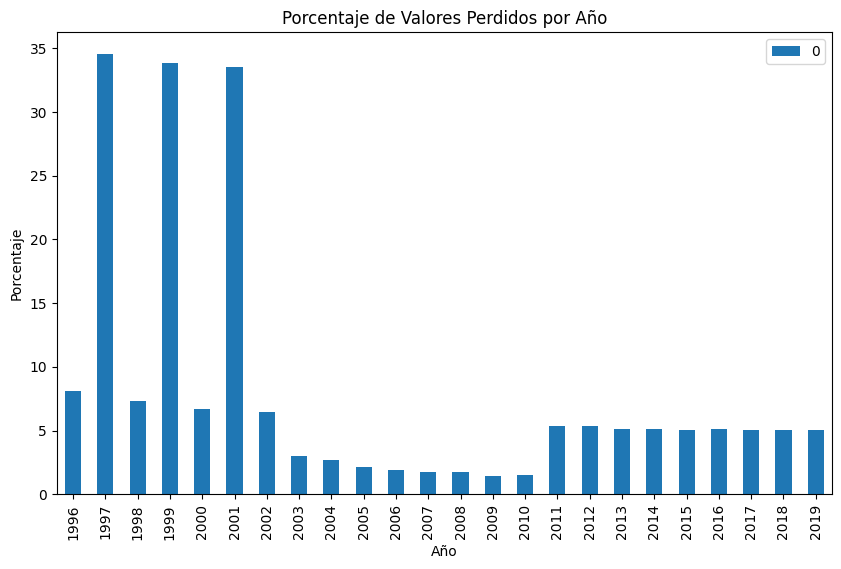

In [ ]:
import matplotlib.pyplot as plt

# Visualizar el porcentaje de valores perdidos en un gráfico de barras
percentage_missing_per_year.plot(kind='bar', figsize=(10, 6))
plt.title('Porcentaje de Valores Perdidos por Año')
plt.ylabel('Porcentaje')
plt.xlabel('Año')
plt.show()

<Axes: >

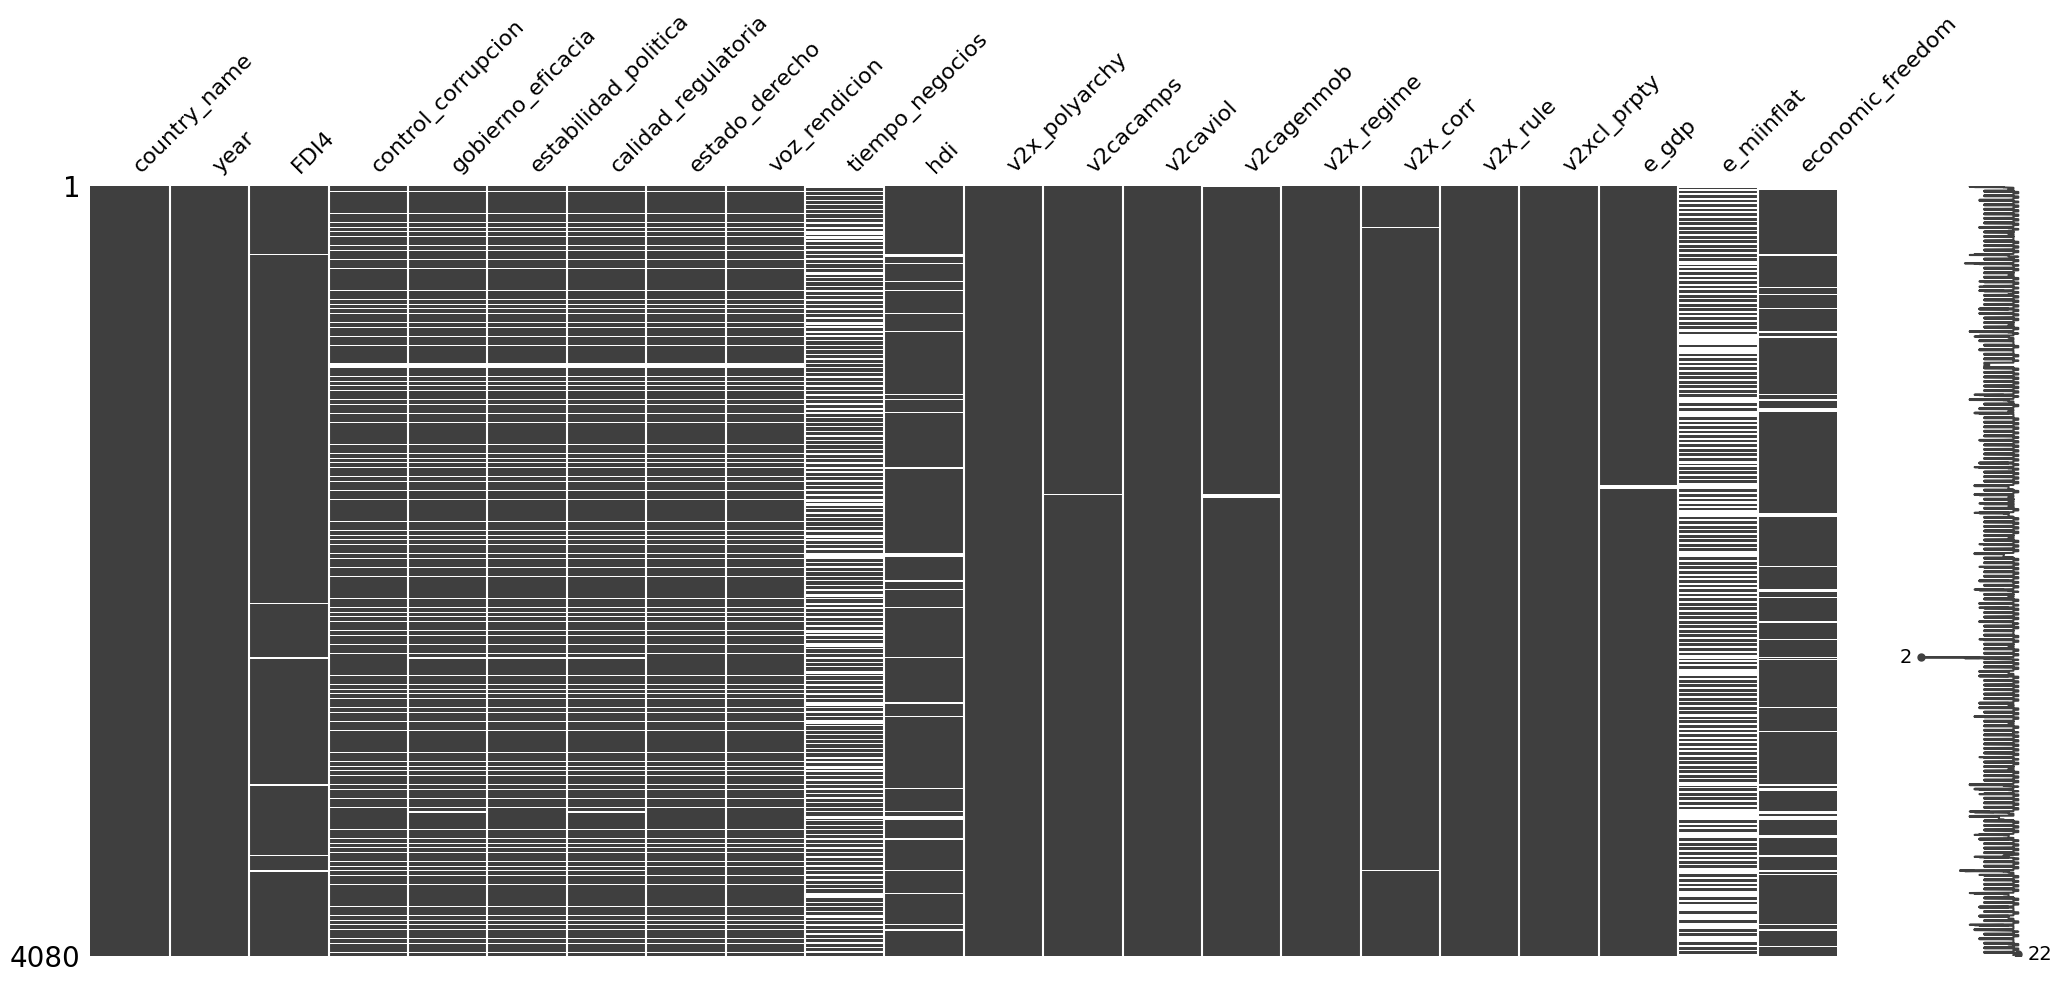

In [ ]:
import missingno as msno
msno.matrix(merged_final)

In [ ]:
# Calcular el número de datos faltantes para FDI4 por país
missing_data_fdi4 = merged_final.groupby('country_name')['FDI4'].apply(lambda x: x.isnull().sum())

# Calcular el número total de registros para FDI4 por país
total_data_fdi4 = merged_final.groupby('country_name')['FDI4'].size()

# Calcular el porcentaje de datos faltantes para FDI4 por país
percentage_missing_fdi4 = (missing_data_fdi4 / total_data_fdi4) * 100

# Ordenar los países por más datos faltantes en FDI4 y resetear el índice para tener el ranking
ranking_fdi4 = missing_data_fdi4.sort_values(ascending=False).reset_index()
ranking_fdi4['rank'] = ranking_fdi4.index + 1
ranking_fdi4['percentage_missing'] = percentage_missing_fdi4[ranking_fdi4['country_name']].values

ranking_fdi4 = pd.DataFrame(ranking_fdi4)

# Mostrar el ranking de países con más datos perdidos en FDI4
ranking_fdi4

,country_name,FDI4,rank,percentage_missing
0,Montenegro,11,1,45.833333
1,Serbia,11,2,45.833333
2,Syrian Arab Republic,8,3,33.333333
3,Timor-Leste,8,4,33.333333
4,Luxembourg,6,5,25.000000
...,...,...,...,...
165,Guatemala,0,166,0.000000
166,Guinea,0,167,0.000000
167,Guinea-Bissau,0,168,0.000000
168,Guyana,0,169,0.000000


#**Base de datos final**

In [ ]:
num_countries = merged_final['country_name'].nunique()
print(f"Merged_final tiene {num_countries} países únicos.")

Merged_final tiene 170 países únicos.


In [ ]:
merged_final

,country_name,year,FDI4,control_corrupcion,gobierno_eficacia,estabilidad_politica,calidad_regulatoria,estado_derecho,voz_rendicion,tiempo_negocios,...,v2cacamps,v2caviol,v2cagenmob,v2x_regime,v2x_corr,v2x_rule,v2xcl_prpty,e_gdp,e_miinflat,economic_freedom
36,Afghanistan,1996,6.900000e+05,-1.291705,-2.175167,-2.417310,-2.090330,-1.788075,-1.908540,NaN,...,2.838,3.111,NaN,Closed Autocracy,0.841,0.084,0.065,1677.632,NaN,NaN
37,Afghanistan,1997,-1.460000e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.838,3.111,NaN,Closed Autocracy,0.762,0.125,0.065,1655.383,NaN,NaN
38,Afghanistan,1998,-1.000000e+04,-1.176012,-2.102292,-2.427355,-2.062872,-1.734887,-2.039301,NaN,...,2.838,2.010,NaN,Closed Autocracy,0.762,0.120,0.065,1636.416,NaN,NaN
39,Afghanistan,1999,6.040000e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.838,2.010,NaN,Closed Autocracy,0.762,0.120,0.065,1633.838,NaN,NaN
40,Afghanistan,2000,1.700000e+05,-1.271724,-2.173946,-2.438969,-2.080253,-1.780661,-2.031417,NaN,...,2.240,2.010,1.377,Closed Autocracy,0.762,0.120,0.065,1678.432,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10702,Zimbabwe,2015,3.992000e+08,-1.317811,-1.202166,-0.618156,-1.631751,-1.324131,-1.166087,91.0,...,2.651,1.768,2.389,Electoral Autocracy,0.746,0.314,0.585,4204.206,NaN,37.6
10703,Zimbabwe,2016,3.430138e+08,-1.271258,-1.209890,-0.619938,-1.684896,-1.381370,-1.178460,91.0,...,2.984,2.022,2.954,Electoral Autocracy,0.765,0.288,0.595,4333.507,NaN,38.2
10704,Zimbabwe,2017,3.071877e+08,-1.281081,-1.238663,-0.708769,-1.564137,-1.385256,-1.195904,61.0,...,2.942,2.022,3.336,Electoral Autocracy,0.744,0.280,0.682,4695.363,NaN,44.0
10705,Zimbabwe,2018,7.178653e+08,-1.227581,-1.261774,-0.722774,-1.509489,-1.278995,-1.140975,32.0,...,2.704,1.851,3.217,Electoral Autocracy,0.769,0.267,0.658,4857.211,NaN,44.0


In [ ]:
# Exportar el DataFrame merged_df a un archivo CSV
merged_final.to_csv('002_bbdd_completa_1996_2019.csv', index=True)